PubMedQA is a novel biomedical question answering (QA) dataset collected from PubMed abstracts. The task of PubMedQA is to answer research biomedical questions with yes/no/maybe using the corresponding abstracts. PubMedQA has 1k expert-annotated (PQA-L), 61.2k unlabeled (PQA-U) and 211.3k artificially generated QA instances (PQA-A).

We use PQA-L, expert annotated.



In [ ]:
# install Huggingface datasets
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# Acquire the PubMedQA Data
# Source:
# https://huggingface.co/datasets/bigbio/pubmed_qa

from datasets import load_dataset

pqal0 = load_dataset("bigbio/pubmed_qa", "pubmed_qa_labeled_fold0_source")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
pqal0['train']

Dataset({
    features: ['QUESTION', 'CONTEXTS', 'LABELS', 'MESHES', 'YEAR', 'reasoning_required_pred', 'reasoning_free_pred', 'final_decision', 'LONG_ANSWER'],
    num_rows: 450
})

In [ ]:
pqal0['train'][0]

{'QUESTION': 'Does histologic chorioamnionitis correspond to clinical chorioamnionitis?',
 'CONTEXTS': ['To evaluate the degree to which histologic chorioamnionitis, a frequent finding in placentas submitted for histopathologic evaluation, correlates with clinical indicators of infection in the mother.',
  'A retrospective review was performed on 52 cases with a histologic diagnosis of acute chorioamnionitis from 2,051 deliveries at University Hospital, Newark, from January 2003 to July 2003. Third-trimester placentas without histologic chorioamnionitis (n = 52) served as controls. Cases and controls were selected sequentially. Maternal medical records were reviewed for indicators of maternal infection.',
  'Histologic chorioamnionitis was significantly associated with the usage of antibiotics (p = 0.0095) and a higher mean white blood cell count (p = 0.018). The presence of 1 or more clinical indicators was significantly associated with the presence of histologic chorioamnionitis (p =

The above example can be read as follows:

Sentence: Query sentence for which matches will be retrieved
Options: Corpus, note Analobench uses a slightly different corpus for each example
Indices: The indices of the texts which ar emost analogically similar to the query text. NOTE: 1-based indexing, not 0 based.

In [ ]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split
import pandas as pd

def process_qa_data(data):

    # Initialize lists to store the components
    prompts = []
    targets = []

    # Label mapping
    label_map = {
        'yes': 2,
        'maybe': 1,
        'no': 0
    }

    # Extract and format components
    for item in data:
        # Format the question with instruction
        question = item['QUESTION']
        question_with_instruction = f"{question}. First consider the context below, then answer with one word: Yes, No, Maybe."

        # Combine contexts
        contexts = ' '.join(item['CONTEXTS'])

        # Create full prompt
        full_prompt = f"{question_with_instruction}\n\nContext: {contexts}"
        prompts.append(full_prompt)

        # Map the decision to numerical value
        target = item['final_decision'].lower()
        targets.append(label_map[target])

    # Create a DataFrame
    df = pd.DataFrame({
        'prompt': prompts,
        'target': target
    })

    return df


In [ ]:
df_train = process_qa_data(pqal0['train'])
df_train['prompt'][0]

'Does histologic chorioamnionitis correspond to clinical chorioamnionitis?. First consider the context below, then answer with one word: Yes, No, Maybe.\n\nContext: To evaluate the degree to which histologic chorioamnionitis, a frequent finding in placentas submitted for histopathologic evaluation, correlates with clinical indicators of infection in the mother. A retrospective review was performed on 52 cases with a histologic diagnosis of acute chorioamnionitis from 2,051 deliveries at University Hospital, Newark, from January 2003 to July 2003. Third-trimester placentas without histologic chorioamnionitis (n = 52) served as controls. Cases and controls were selected sequentially. Maternal medical records were reviewed for indicators of maternal infection. Histologic chorioamnionitis was significantly associated with the usage of antibiotics (p = 0.0095) and a higher mean white blood cell count (p = 0.018). The presence of 1 or more clinical indicators was significantly associated wit

In [ ]:



# Print some basic information
print("\nDataset Overview:")
print(f"Total training samples: {len(df_train)}")
print(f"Total test samples: {len(df_train)}")

print("\nLabel mapping:")
print("0 = no")
print("1 = maybe")
print("2 = yes")

print("\nLabel distribution in training set:")
label_counts_train = df_train['target'].value_counts().sort_index()
print(label_counts_train)
print("\nPercentages in training set:")
print(label_counts_train / len(df_train) * 100)

# Print an example prompt
print("\nExample prompt format:")
print("-" * 50)
print(df_train['prompt'].iloc[0])
print("-" * 50)
print(f"Label: {df_train['target'].iloc[0]}")



Dataset Overview:
Total training samples: 450
Total test samples: 450

Label mapping:
0 = no
1 = maybe
2 = yes

Label distribution in training set:
target
yes    450
Name: count, dtype: int64

Percentages in training set:
target
yes    100.0
Name: count, dtype: float64

Example prompt format:
--------------------------------------------------
Does histologic chorioamnionitis correspond to clinical chorioamnionitis?. First consider the context below, then answer with one word: Yes, No, Maybe.

Context: To evaluate the degree to which histologic chorioamnionitis, a frequent finding in placentas submitted for histopathologic evaluation, correlates with clinical indicators of infection in the mother. A retrospective review was performed on 52 cases with a histologic diagnosis of acute chorioamnionitis from 2,051 deliveries at University Hospital, Newark, from January 2003 to July 2003. Third-trimester placentas without histologic chorioamnionitis (n = 52) served as controls. Cases and con

In [ ]:

# Optionally save to CSV
# df_train.to_csv('train_data.csv', index=False)

# Test
df_test = process_qa_data(pqal0['test'])


## The SAE

In [ ]:
!pip install huggingface_hub
from huggingface_hub import notebook_login

notebook_login()

## Set up Environment

In [ ]:
import google.colab
from google.colab import output
%pip install sae-lens transformer-lens sae-dashboard

# Standard imports
import os
import torch
from tqdm import tqdm
import plotly.express as px

# Imports for displaying vis in Colab / notebook
torch.set_grad_enabled(False)

# For the most part I'll try to import functions and classes near where they are used
# to make it clear where they come from.
if torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Device: {device}")


Device: cuda


### Loading a Pretrained Sparse Autoencoder (SAE)

We are told the used an SAE with this specification

pt-res, layer 12 residual, 16k features, average L0 of 41

#### LLM Blocks

Choices include:
- Residuals (RES),
- Attention Mechanism (ATT),
- Fully Connected Layers (MLP)

*The papers recommends the residuals block*

The residuals are where activations from previous layers are brought together before passing to the next layer.Residuals contains the greatest amount of information so are preferred. Furthermore, only the residuals are supported by Neuronpedia.

#### Hook Location

The hook location is where to measure the activations on the SAE.

hook_sae_input:
- The input to the SAE, before decompression. Allows us to modify the input to observe effects downstream.

hook_sae_acts_pre:
- Activations of the SAE's hidden layer BEFORE any non-linear activation function or sparsity constraints. Allows us to explore the raw activations before non-linearity

hook_sae_acts_post:
- Activations of the SAE's hidden layer AFTER any non-linear activation function or sparsity constraints. Allows us to identify which neurons (features) are active.

hook_sae_recons
- Reconstructed output from the SAE's decoder, returning features back to compressed form for comparison with the compressed input from the LLM. Allows us to detect any degradation or loss in the SAE.

*The paper recommends the POST (PT) hook point.* this is the traditional 'activation', after the activation has been applied.

#### Sparsity

Sparsity of the SAE is measured by the Average L₀

The L₀ norm of a vector is defined as the number of its non-zero entries. A lower L₀ indicates higher sparsity, which is what we seek in an SAE

*The paper recommneds an SAE with L 14*

In [ ]:
# View Gemma2-2B SAE's

from sae_lens.toolkit.pretrained_saes_directory import get_pretrained_saes_directory

df = pd.DataFrame.from_records({k:v.__dict__ for k,v in get_pretrained_saes_directory().items()}).T
df.drop(columns=["expected_var_explained", "expected_l0", "config_overrides", "conversion_func"], inplace=True)

df[df['model']=='gemma-2-2b']

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

,release,repo_id,model,saes_map,neuronpedia_id
gemma-scope-2b-pt-att,gemma-scope-2b-pt-att,google/gemma-scope-2b-pt-att,gemma-2-2b,{'layer_0/width_16k/average_l0_104': 'layer_0/...,"{'layer_0/width_16k/average_l0_104': None, 'la..."
gemma-scope-2b-pt-att-canonical,gemma-scope-2b-pt-att-canonical,google/gemma-scope-2b-pt-att,gemma-2-2b,{'layer_0/width_16k/canonical': 'layer_0/width...,{'layer_0/width_16k/canonical': 'gemma-2-2b/0-...
gemma-scope-2b-pt-mlp,gemma-scope-2b-pt-mlp,google/gemma-scope-2b-pt-mlp,gemma-2-2b,{'layer_0/width_16k/average_l0_119': 'layer_0/...,"{'layer_0/width_16k/average_l0_119': None, 'la..."
gemma-scope-2b-pt-mlp-canonical,gemma-scope-2b-pt-mlp-canonical,google/gemma-scope-2b-pt-mlp,gemma-2-2b,{'layer_0/width_16k/canonical': 'layer_0/width...,{'layer_0/width_16k/canonical': 'gemma-2-2b/0-...
gemma-scope-2b-pt-res,gemma-scope-2b-pt-res,google/gemma-scope-2b-pt-res,gemma-2-2b,{'embedding/width_4k/average_l0_6': 'embedding...,"{'embedding/width_4k/average_l0_6': None, 'emb..."
gemma-scope-2b-pt-res-canonical,gemma-scope-2b-pt-res-canonical,google/gemma-scope-2b-pt-res,gemma-2-2b,{'layer_0/width_16k/canonical': 'layer_0/width...,{'layer_0/width_16k/canonical': 'gemma-2-2b/0-...
sae_bench_gemma-2-2b_topk_width-2pow12_date-1109,sae_bench_gemma-2-2b_topk_width-2pow12_date-1109,canrager/saebench_gemma-2-2b_width-2pow12_date...,gemma-2-2b,{'blocks.12.hook_resid_post__trainer_0': 'gemm...,{'blocks.12.hook_resid_post__trainer_0': 'gemm...
sae_bench_gemma-2-2b_topk_width-2pow14_date-1109,sae_bench_gemma-2-2b_topk_width-2pow14_date-1109,canrager/saebench_gemma-2-2b_width-2pow14_date...,gemma-2-2b,{'blocks.12.hook_resid_post__trainer_0': 'gemm...,{'blocks.12.hook_resid_post__trainer_0': 'gemm...
sae_bench_gemma-2-2b_topk_width-2pow16_date-1109,sae_bench_gemma-2-2b_topk_width-2pow16_date-1109,canrager/saebench_gemma-2-2b_width-2pow16_date...,gemma-2-2b,{'blocks.12.hook_resid_post__trainer_0': 'gemm...,{'blocks.12.hook_resid_post__trainer_0': 'gemm...
sae_bench_gemma-2-2b_vanilla_width-2pow12_date-1109,sae_bench_gemma-2-2b_vanilla_width-2pow12_date...,canrager/saebench_gemma-2-2b_width-2pow12_date...,gemma-2-2b,{'blocks.12.hook_resid_post__trainer_0': 'gemm...,{'blocks.12.hook_resid_post__trainer_0': 'gemm...


In [ ]:
# View SAEs for "gemma-scope-2b-pt-res"

print("SAEs in the Gemma-2-2b Residual release")
for k,v in df.loc[df.release == "gemma-scope-2b-pt-res-canonical", "saes_map"].values[0].items():
    print(f"SAE id: {k} for hook point: {v}")

SAEs in the Gemma-2-2b Residual release
SAE id: layer_0/width_16k/canonical for hook point: layer_0/width_16k/average_l0_105
SAE id: layer_1/width_16k/canonical for hook point: layer_1/width_16k/average_l0_102
SAE id: layer_2/width_16k/canonical for hook point: layer_2/width_16k/average_l0_141
SAE id: layer_3/width_16k/canonical for hook point: layer_3/width_16k/average_l0_59
SAE id: layer_4/width_16k/canonical for hook point: layer_4/width_16k/average_l0_124
SAE id: layer_5/width_16k/canonical for hook point: layer_5/width_16k/average_l0_68
SAE id: layer_6/width_16k/canonical for hook point: layer_6/width_16k/average_l0_70
SAE id: layer_7/width_16k/canonical for hook point: layer_7/width_16k/average_l0_69
SAE id: layer_8/width_16k/canonical for hook point: layer_8/width_16k/average_l0_71
SAE id: layer_9/width_16k/canonical for hook point: layer_9/width_16k/average_l0_73
SAE id: layer_10/width_16k/canonical for hook point: layer_10/width_16k/average_l0_77
SAE id: layer_11/width_16k/can

### Load the selected SAE

Take an interest in
- Dims in: d_in
- Dims out: d_sae
- context_size:


In [ ]:
# from transformer_lens import HookedTransformer
from sae_lens import SAE, HookedSAETransformer

model = HookedSAETransformer.from_pretrained("gemma-2-2b", device = device)

# the cfg dict is returned alongside the SAE since it may contain useful information for analysing the SAE (eg: instantiating an activation store)
# Note that this is not the same as the SAEs config dict, rather it is whatever was in the huggingface (HF) repo, from which we can extract the SAE config dict
# We also return the feature sparsities which are stored in HF for convenience.
sae, cfg_dict, sparsity = SAE.from_pretrained(
    release = "gemma-scope-2b-pt-res-canonical", # <- Release name
    sae_id = "layer_12/width_16k/canonical", # <- SAE id (not always a hook point!)
    # hook point: "layer_12/width_16k/average_l0_82"
    device = device
)

# print details abut the SAE
print(sae.cfg.__dict__)

config.json:   0%|          | 0.00/818 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/481M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

Loaded pretrained model gemma-2-2b into HookedTransformer


params.npz:   0%|          | 0.00/302M [00:00<?, ?B/s]

{'architecture': 'jumprelu', 'd_in': 2304, 'd_sae': 16384, 'activation_fn_str': 'relu', 'apply_b_dec_to_input': False, 'finetuning_scaling_factor': False, 'context_size': 1024, 'model_name': 'gemma-2-2b', 'hook_name': 'blocks.12.hook_resid_post', 'hook_layer': 12, 'hook_head_index': None, 'prepend_bos': True, 'dataset_path': 'monology/pile-uncopyrighted', 'dataset_trust_remote_code': True, 'normalize_activations': None, 'dtype': 'float32', 'device': 'cuda', 'sae_lens_training_version': None, 'activation_fn_kwargs': {}, 'neuronpedia_id': 'gemma-2-2b/12-gemmascope-res-16k', 'model_from_pretrained_kwargs': {}, 'seqpos_slice': (None,)}


Below, we'll use the run_with_cache_with_saes function of the HookedSAETransformer, which will give us all the cached activations (including those from the SAE that we've specified in the arguments).

In [ ]:
# SAEs don't reconstruct activation perfectly, so if you attach an SAE and want the model to stay performant, you need to use the error term.
# This is because the SAE will be used to modify the forward pass, and if it doesn't reconstruct the activations well, the outputs may be affected.
# Good SAEs have small error terms but it's something to be mindful of.

sae.use_error_term # If use error term is set to false, we will modify the forward pass by using the sae.

False

Test a sentence

In [ ]:
# hooked SAE Transformer will enable us to get the feature activations from the SAE
prompt = 'All that glitters is not gold.'

_, cache = model.run_with_cache_with_saes(prompt, saes=[sae])


In [ ]:
# let's look at which features fired at layer 12 at the *final token position*

from IPython.display import IFrame
html_template = "https://neuronpedia.org/{}/{}/{}?embed=true&embedexplanation=true&embedplots=true&embedtest=true&height=300"
def get_dashboard_html(sae_release = "gemma-scope-2b-pt-res-canonical", sae_id="layer_12/width_16k/canonical", feature_idx=0):
    return html_template.format(sae_release, sae_id, feature_idx)

layer_hook= 'blocks.12.hook_resid_post.hook_sae_acts_post'

# hover over lines to see the Feature ID.
px.line(
    #cache[layer_hook][0].mean(dim=0).cpu().numpy(), # mean
    cache[layer_hook][0, -1, :].cpu().numpy(), # final token
    title="Feature activations at the final token position",
    labels={"index": "Feature", "value": "Activation"},
).show()

In [ ]:
activations = cache[layer_hook]
activations.shape

torch.Size([1, 9, 16384])

In [ ]:
# activations_mn = activations[0].mean(dim=0) # mean
activations_mn = activations[0, -1, :] # final token

activations_mn = activations_mn.cpu().numpy()

activations_mn

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

## Create SAE Embedder Class

In [ ]:
import torch
from sae_lens import SAE, HookedSAETransformer
from typing import Tuple, Union
import numpy as np

class SAEEmbedder:
    def __init__(self, model, sae, device):
        """Initialize the SAE embedder with the Gemma model and SAE."""
        self.model = model
        self.sae = sae
        self.device = device

        print(f"Using device: {self.device}")

    def get_embeddings(
        self,
        sentence: str,
        return_type: str = "continuous",
        threshold: float = 5.0
    ) -> Union[torch.Tensor, Tuple[torch.Tensor, torch.Tensor]]:
        """
        Get SAE embeddings for a sentence.

        Args:
            sentence (str): Input sentence to embed
            return_type (str): One of "continuous", "binary", or "both"

        Returns:
            If return_type is "continuous": torch.Tensor of shape (n_features,) with continuous activations
            If return_type is "binary": torch.Tensor of shape (n_features,) with binary activations
            If return_type is "both": Tuple of (continuous_tensor, binary_tensor)
        """
        # Validate return type
        valid_types = ["continuous", "binary", "both"]
        if return_type not in valid_types:
            raise ValueError(f"return_type must be one of {valid_types}")

        # Strip trailing punctuation
        # We do this because we take the activations of the final token in the sentence
        # Not, an average over all tokens. This is common for autoregressive models like GPT.
        # Therefore, it helps if the final token is not punctuation
        sentence = sentence.rstrip('!.,;:?"\'')

        # Get model outputs
        _, cache = self.model.run_with_cache_with_saes(sentence, saes=[self.sae])

        # Get SAE activations for the sentence
        # Shape: (batch_size=1, seq_len, n_features)
        activations = cache["blocks.12.hook_resid_post.hook_sae_acts_post"]

        # Gemma-2-2B is a bidirectional model, not autoregressive
        # So when getting embeddings, better to take the mean over all tokens
        # Whereas in autoregressive models we prefer the embedding of the final token
        # IF we had wanted the embedding from the final token then we would do this...
        # cache[layer_hook][0, -1, :].cpu().numpy(),

        # continuous_embedding = activations[0].mean(dim=0).cpu().numpy() # mean
        continuous_embedding = activations[0, -1, :].cpu().numpy() # final_token

        if return_type == "continuous":
            return continuous_embedding

        # Get binary embedding (activation > threshold)
        binary_embedding = (continuous_embedding > threshold).astype(int)

        if return_type == "binary":
            return binary_embedding

        # default return both
        return continuous_embedding, binary_embedding


In [ ]:
# Example usage
embedder = SAEEmbedder(model=model, sae=sae, device=device)

# Test sentence
sentence = "All that glitters is not gold."

# Get both types of embeddings
continuous_emb, binary_emb = embedder.get_embeddings(sentence, 'both', threshold=4.0)

print(f"\nContinuous embedding shape: {continuous_emb.shape}")
print(f"Number of non-zero continuous activations: {(continuous_emb > 0).sum()}")
print(f"Binary embedding shape: {binary_emb.shape}")
print(f"Number of activated features (threshold): {binary_emb.sum()}")

# Print some statistics
print(f"\nContinuous embedding stats:")
print(f"Mean: {continuous_emb.mean():.4f}")
print(f"Std:  {continuous_emb.std():.4f}")
print(f"Max:  {continuous_emb.max():.4f}")
print(f"Min:  {continuous_emb.min():.4f}")


Using device: cuda

Continuous embedding shape: (16384,)
Number of non-zero continuous activations: 119
Binary embedding shape: (16384,)
Number of activated features (threshold): 71

Continuous embedding stats:
Mean: 0.0459
Std:  0.7054
Max:  33.6975
Min:  0.0000


## Using FAISS Pipeline with Custom Embedding Model

The SAE providing analogical embeddings will not work as a standard embedding model provided via the transformers package to FAISS.
Therefore, to use it in RAG, we must:

- Create a method get_custom_embedding(text) that takes a sentence and returns a dense embedding as a NumPy array.
- Generate Corpus Embeddings: Use your model to create embeddings for all sentences in your corpus.
- Set Up FAISS Index: Initialize a FAISS index with the correct embedding dimension.
- Query the FAISS Index: For each query, generate an embedding with your custom model and retrieve similar embeddings.

In [ ]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 80.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import faiss
from sklearn.decomposition import PCA

corpus = df_train

# Generate embeddings for the corpus
corpus_embeddings_sae = np.array([embedder.get_embeddings(sentence=sentence, return_type='continuous') for sentence in corpus]).astype("float32")


In [ ]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Initialize TruncatedSVD
svd = TruncatedSVD(n_components=300, random_state=42)

# Fit and transform the data
corpus_embeddings_sae_svd = svd.fit_transform(corpus_embeddings_sae)

# Calculate explained variance ratio
explained_variance_ratio = svd.explained_variance_ratio_.sum()

print("Truncated SVD\n")
print(f"Original shape: {corpus_embeddings_sae.shape}")
print(f"Reduced shape: {corpus_embeddings_sae_svd.shape}")
print(f"Total variance explained: {explained_variance_ratio:.2%}")


Truncated SVD

Original shape: (2, 16384)
Reduced shape: (2, 2)
Total variance explained: 100.00%


In [ ]:
# 2. Apply PCA dimensionality reduction
# target dimensionality
n_components = 300
pca = PCA(n_components=n_components)

# Fit and transform corpus embeddings
corpus_embeddings_sae_pca = pca.fit_transform(corpus_embeddings_sae).astype("float32")

# Print variance explained
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

print("PCA\n")
print(f"Original shape: {corpus_embeddings_sae.shape}")
print(f"Reduced shape: {corpus_embeddings_sae_pca.shape}")
print(f"Variance explained by {n_components} components: {cumulative_variance_ratio[-1]:.3f}")


ValueError: n_components=300 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'

In [ ]:
import numpy as np
import faiss

def perform_faiss_search(
    corpus,
    corpus_embeddings,
    test_sentence,
    embedder,
    expected_indices=None,
    compressor=None,
    k=5,
    method_name="Default"
):
    """
    Perform FAISS search with different dimension reduction methods.

    Parameters:
    -----------
    corpus : list
        List of documents/sentences to search through
    corpus_embeddings : numpy.ndarray
        Pre-computed embeddings for the corpus
    test_sentence : str
        Query sentence to search for
    embedder : object
        Embedder object with get_embeddings method
    expected_indices : list, optional
        Expected indices for scoring (if None, scoring is skipped)
    compressor : object, optional
        Dimension reduction object (PCA, TruncatedSVD, etc.)
    k : int, optional
        Number of results to return (default: 5)
    method_name : str, optional
        Name of the method being used (for display purposes)

    Returns:
    --------
    tuple
        (distances, indices) of the search results
    """
    # Create FAISS vector database
    index = faiss.IndexFlatL2(corpus_embeddings.shape[1])

    # Ensure corpus embeddings are in the right format
    if compressor:
        corpus_embeddings = np.ascontiguousarray(corpus_embeddings, dtype=np.float32)
    index.add(corpus_embeddings)

    # Get query embedding
    test_embedding = np.array([embedder.get_embeddings(test_sentence)])
    if compressor:
        test_embedding = compressor.transform(test_embedding.reshape(1, -1)).astype("float32")

    # Retrieve top k matches
    distances, indices = index.search(test_embedding, k)

    # Display results
    print(f"\nResults with {method_name}\n")
    print("Query:", test_sentence)
    print(f"\nTop {k} matches:")
    for i, idx in enumerate(indices[0]):
        print(f"{i + 1}: {corpus[idx]} (Distance: {distances[0][i]:.4f})")

    # Score results if expected indices are provided
    if expected_indices is not None:
        print(f"\nScores for {method_name}:")
        compare_embeddings_with_expected(index, embedder.get_embeddings,
                                       expected_indices, compressor=compressor)

    return distances, indices

In [ ]:
# Original embeddings
distances_SAE, indices_SAE = perform_faiss_search(
    corpus=corpus,
    corpus_embeddings=corpus_embeddings_sae,
    test_sentence="All that glitters is not gold.",
    embedder=embedder,
    expected_indices=expected_indices,
    method_name="SAE Embeddings"
)


Results with SAE Embeddings

Query: All that glitters is not gold.

Top 5 matches:
1: All that glitters is not gold. (Distance: 0.0000)
2: We should go early to the boutique on the day of their sale to get the best stuff. The early bird catches the worm!. (Distance: 7591.1499)
3: Don’t rush through your assignment, remember haste makes waste. (Distance: 7680.7876)
4: Don’t judge people based on appearances alone; appearances can be deceptive. (Distance: 7710.9287)
5: Sometimes I feel I should have gone for my master’s degree like you instead of this job. Well, the grass is always greener on the other side. (Distance: 8184.5415)

Scores for SAE Embeddings:
Mean Reciprocal Rank (MRR): 0.16392740429505134
NB: Higher is better: MRR measures how high up in the results list the first relevant item appears

Mean Precision@10: 0.05823529411764707
NB: Higher is better. Measures the proportion of relevant items in the top k results



In [ ]:
# PCA reduced embeddings
distances_PCA, indices_PCA = perform_faiss_search(
    corpus=corpus,
    corpus_embeddings=corpus_embeddings_sae_pca,
    test_sentence="All that glitters is not gold.",
    embedder=embedder,
    expected_indices=expected_indices,
    compressor=pca,
    method_name="SAE with PCA"
)


Results with SAE with PCA

Query: All that glitters is not gold.

Top 5 matches:
1: All that glitters is not gold. (Distance: 0.0000)
2: We should go early to the boutique on the day of their sale to get the best stuff. The early bird catches the worm!. (Distance: 7220.5361)
3: Don’t rush through your assignment, remember haste makes waste. (Distance: 7581.2334)
4: Don’t judge people based on appearances alone; appearances can be deceptive. (Distance: 7592.6147)
5: The way the book is written, I get distracted by the peculiar grammar and word choice and can't learn anything from it. (Distance: 7746.9639)

Scores for SAE with PCA:
Mean Reciprocal Rank (MRR): 0.1390592903828198
NB: Higher is better: MRR measures how high up in the results list the first relevant item appears

Mean Precision@10: 0.047058823529411764
NB: Higher is better. Measures the proportion of relevant items in the top k results



In [ ]:
# SVD reduced embeddings
distances_SVD, indices_SVD = perform_faiss_search(
    corpus=corpus,
    corpus_embeddings=corpus_embeddings_sae_svd,
    test_sentence="All that glitters is not gold.",
    embedder=embedder,
    expected_indices=expected_indices,
    compressor=svd,
    method_name="SAE with Truncated SVD"
)


Results with SAE with Truncated SVD

Query: All that glitters is not gold.

Top 5 matches:
1: All that glitters is not gold. (Distance: 0.0000)
2: We should go early to the boutique on the day of their sale to get the best stuff. The early bird catches the worm!. (Distance: 7076.3506)
3: Don’t judge people based on appearances alone; appearances can be deceptive. (Distance: 7389.2920)
4: Don’t rush through your assignment, remember haste makes waste. (Distance: 7525.2852)
5: Fred built an immense fortune by swindling others, but he lost it all when someone swindled him. (Distance: 7655.2363)

Scores for SAE with Truncated SVD:
Mean Reciprocal Rank (MRR): 0.1398704481792717
NB: Higher is better: MRR measures how high up in the results list the first relevant item appears

Mean Precision@10: 0.04470588235294117
NB: Higher is better. Measures the proportion of relevant items in the top k results



## Threshold

Apply threshold of 1.0 to all feature activations, as per the Gemotry of Concepts paper.

In [ ]:
import numpy as np

def threshold_embeddings(embeddings: np.ndarray, threshold: float = 1.0) -> np.ndarray:
    """
    Apply threshold to embeddings, setting values below threshold to 0.

    Args:
        embeddings: Array of shape (n_sentences, n_features)
        threshold: Minimum activation value to keep (default 1.0)

    Returns:
        Thresholded embeddings array of same shape
    """
    thresholded = embeddings.copy()
    thresholded[np.abs(thresholded) < threshold] = 0
    return thresholded

# Apply the threshold
thresholded_embeddings = threshold_embeddings(corpus_embeddings_sae)

# Print some statistics about the thresholding
original_nonzero = np.count_nonzero(corpus_embeddings_sae)
thresholded_nonzero = np.count_nonzero(thresholded_embeddings)
total_elements = corpus_embeddings_sae.size

print(f"Original non-zero elements: {original_nonzero:,} ({original_nonzero/total_elements*100:.2f}%)")
print(f"After thresholding: {thresholded_nonzero:,} ({thresholded_nonzero/total_elements*100:.2f}%)")

# Per-sentence statistics
original_nonzero_per_sentence = np.count_nonzero(corpus_embeddings_sae, axis=1)
thresholded_nonzero_per_sentence = np.count_nonzero(thresholded_embeddings, axis=1)

print("\nPer-sentence statistics:")
print(f"Original features per sentence: {original_nonzero_per_sentence.mean():.1f} ± {original_nonzero_per_sentence.std():.1f}")
print(f"After thresholding: {thresholded_nonzero_per_sentence.mean():.1f} ± {thresholded_nonzero_per_sentence.std():.1f}")

# Check if any sentences lost all features
zero_sentences = np.sum(thresholded_nonzero_per_sentence == 0)
if zero_sentences > 0:
    print(f"\nWarning: {zero_sentences} sentences have no features after thresholding!")

# Optional: run the previous analysis on thresholded embeddings
analysis_results_thresholded = analyze_feature_types(
    embeddings=thresholded_embeddings,
    sentence_lengths=sentence_lengths,
    correlation_threshold=0.7,
    activation_threshold=0.0
)

print("\nFeature analysis after thresholding:")
print(f"Found:")
print(f"- {len(analysis_results_thresholded['length_features'])} length-marking features")
print(f"- {len(analysis_results_thresholded['semantic_features'])} semantic features")
print(f"- {len(analysis_results_thresholded['length_sensitive_semantics'])} length-sensitive semantic features")

Original non-zero elements: 38,192 (0.69%)
After thresholding: 38,192 (0.69%)

Per-sentence statistics:
Original features per sentence: 112.3 ± 20.8
After thresholding: 112.3 ± 20.8


NameError: name 'analyze_feature_types' is not defined

## Normalise

Normalise the embeddings to reduce distracting sentence length signal

In [ ]:
def normalize_embeddings(embeddings):
    """Normalize each embedding vector to unit length"""
    return embeddings / np.linalg.norm(embeddings, axis=1)[:, np.newaxis]

corpus_embeddings_sae_ths_nml = normalize_embeddings(thresholded_embeddings)

# Test thresholded and normalised mbeddings
distances_ths_nml, indices_ths_nml = perform_faiss_search(
    corpus=corpus,
    corpus_embeddings=corpus_embeddings_sae_ths_nml,
    test_sentence="All that glitters is not gold.",
    embedder=embedder,
    expected_indices=expected_indices,
    compressor=None,
    method_name=": SAE with Thresholded and Normalised Embeddings"
)


Results with : SAE with Thresholded and Normalised Embeddings

Query: All that glitters is not gold.

Top 5 matches:
1: All that glitters is not gold. (Distance: 8007.7412)
2: We should go early to the boutique on the day of their sale to get the best stuff. The early bird catches the worm!. (Distance: 8090.4434)
3: My daughter creates problems for my mom in the afternoon if she has nothing else to do. After all, an idle brain is the devil’s workshop. (Distance: 8091.4536)
4: Don’t rush through your assignment, remember haste makes waste. (Distance: 8097.1196)
5: Don’t invest all your money in the stock market, you should never put all your eggs in one basket. (Distance: 8097.3242)

Scores for : SAE with Thresholded and Normalised Embeddings:
Mean Reciprocal Rank (MRR): 0.23307539682539685
NB: Higher is better: MRR measures how high up in the results list the first relevant item appears

Mean Precision@10: 0.08647058823529412
NB: Higher is better. Measures the proportion of relevant i

WORSE!!

Regress Out Length Relationships

In [ ]:
def get_token_lengths(sentences):
    """
    Get token lengths using Gemma's tokenizer
    """
    # Initialize Gemma tokenizer
    tokenizer = AutoTokenizer.from_pretrained("google/gemma-2b")

    # Get token lengths for each sentence
    token_lengths = np.array([
        len(tokenizer.encode(s)) for s in sentences
    ])

    return token_lengths

def residualize_length(embeddings, token_lengths):
    """
    For each component, regress out the linear relationship with length
    Returns embeddings with length effects removed
    """
    cleaned = np.zeros_like(embeddings)

    for i in range(embeddings.shape[1]):
        # Fit linear regression
        reg = LinearRegression()
        reg.fit(token_lengths.reshape(-1, 1), embeddings[:, i])

        # Get residuals
        predicted = reg.predict(token_lengths.reshape(-1, 1))
        cleaned[:, i] = embeddings[:, i] - predicted

    return cleaned

In [ ]:
token_lengths = get_token_lengths(corpus)
corpus_embeddings_sae_rgs = residualize_length(corpus_embeddings_sae, token_lengths)

# Test length regressed embeddings
distances_rgs, indices_rgs = perform_faiss_search(
    corpus=corpus,
    corpus_embeddings=corpus_embeddings_sae_rgs,
    test_sentence="All that glitters is not gold.",
    embedder=embedder,
    expected_indices=expected_indices,
    compressor=None,
    method_name=": SAE with Length Regressed Embeddings"
)


Results with : SAE with Length Regressed Embeddings

Query: All that glitters is not gold.

Top 5 matches:
1: A fallen tree cannot provide shade. (Distance: 34723.0664)
2: A forest grew near the river. (Distance: 36334.9727)
3: Liam lied to get into the school; Lary did not. Liam had a difficult time trying to hide the deception as a result. But unlike Liam, Lary did not have to worry about anything else, so he had a terrific time. (Distance: 45980.4531)
4: All that glitters is not gold. (Distance: 49499.5742)
5: A succession of waves battered the rock. (Distance: 50191.1250)

Scores for : SAE with Length Regressed Embeddings:
Mean Reciprocal Rank (MRR): 0.07107142857142858
NB: Higher is better: MRR measures how high up in the results list the first relevant item appears

Mean Precision@10: 0.026470588235294124
NB: Higher is better. Measures the proportion of relevant items in the top k results




Results with : SAE with Length Effects Removed

Query: All that glitters is not gold.

Top 5 matches:
1: All that glitters is not gold. (Distance: 30.6602)
2: A succession of waves battered the rock. (Distance: 1845.6520)
3: He attacked every point in my argument. (Distance: 1898.9766)
4: Many students came to study under the guru. (Distance: 3085.5627)
5: He collapsed after he ran for the marathon. (Distance: 3164.4204)

Scores for : SAE with Length Effects Removed:
Mean Reciprocal Rank (MRR): 0.3246241830065359
NB: Higher is better: MRR measures how high up in the results list the first relevant item appears

Mean Precision@10: 0.12470588235294117
NB: Higher is better. Measures the proportion of relevant items in the top k results



## Distractor Dimensions

The above retrieved sentences from the SAE score lower than the traditional methods. Also, the retrieved sentences all appear of similar length.

It is possible we have a 'distractor' feature, similar to that discussed in the Geometry of Concepts. This distractor is dominating the other features and resembles sentences length.

Below are funciton which attempt to find any correlation in the embeddings between the featurers and the sentence length (in tokens)

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from typing import List, Tuple
from transformers import AutoTokenizer

def analyze_vector_components(embeddings: np.ndarray,
                            sentence_lengths: List[int],
                            top_k: int = 5) -> List[Tuple[int, float]]:
    """
    Analyze correlation between each vector component and sentence length.

    Args:
        embeddings: Array of shape (n_sentences, embedding_dim)
        sentence_lengths: List of sentence lengths
        top_k: Number of top correlations to return

    Returns:
        List of (index, correlation) tuples for components most correlated with length
    """
    correlations = []
    for i in range(embeddings.shape[1]):
        correlation, _ = stats.pearsonr(embeddings[:, i], sentence_lengths)
        correlations.append((i, abs(correlation)))

    # Sort by absolute correlation and return top k
    return sorted(correlations, key=lambda x: x[1], reverse=True)[:top_k]



In [ ]:
def analyze_activation_scale(embeddings: np.ndarray,
                           sentence_lengths: List[int]) -> Tuple[float, float]:
    """
    Analyze correlation between overall activation scale and sentence length.
    Tests both L1 and L2 norms.

    Returns:
        Tuple of (l1_correlation, l2_correlation)
    """
    l1_norms = np.sum(np.abs(embeddings), axis=1)
    l2_norms = np.linalg.norm(embeddings, axis=1)

    l1_corr, _ = stats.pearsonr(l1_norms, sentence_lengths)
    l2_corr, _ = stats.pearsonr(l2_norms, sentence_lengths)

    return l1_corr, l2_corr

In [ ]:
def analyze_sparsity_pattern(embeddings: np.ndarray,
                           sentence_lengths: List[int]) -> float:
    """
    Analyze if number of non-zero components correlates with length.

    Returns:
        Correlation coefficient between number of non-zero elements and length
    """
    non_zero_counts = np.count_nonzero(embeddings, axis=1)
    correlation, _ = stats.pearsonr(non_zero_counts, sentence_lengths)
    return correlation

In [ ]:
def visualize_correlations(embeddings: np.ndarray,
                          sentence_lengths: List[int],
                          component_idx: int = None):
    """
    Create scatter plots for various correlation analyses.
    If component_idx is provided, also plot that specific component vs length.
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))

    # Plot L1 norm correlation
    l1_norms = np.sum(np.abs(embeddings), axis=1)
    axes[0,0].scatter(sentence_lengths, l1_norms)
    axes[0,0].set_xlabel('Sentence Length')
    axes[0,0].set_ylabel('L1 Norm')
    axes[0,0].set_title('L1 Norm vs Sentence Length')

    # Plot L2 norm correlation
    l2_norms = np.linalg.norm(embeddings, axis=1)
    axes[0,1].scatter(sentence_lengths, l2_norms)
    axes[0,1].set_xlabel('Sentence Length')
    axes[0,1].set_ylabel('L2 Norm')
    axes[0,1].set_title('L2 Norm vs Sentence Length')

    # Plot sparsity correlation
    non_zero_counts = np.count_nonzero(embeddings, axis=1)
    axes[1,0].scatter(sentence_lengths, non_zero_counts)
    axes[1,0].set_xlabel('Sentence Length')
    axes[1,0].set_ylabel('Number of Non-zero Elements')
    axes[1,0].set_title('Sparsity vs Sentence Length')

    # Plot specific component if provided
    if component_idx is not None:
        axes[1,1].scatter(sentence_lengths, embeddings[:, component_idx])
        axes[1,1].set_xlabel('Sentence Length')
        axes[1,1].set_ylabel(f'Component {component_idx} Value')
        axes[1,1].set_title(f'Component {component_idx} vs Sentence Length')

    plt.tight_layout()
    return fig


In [ ]:

# Example usage:
def run_analysis(embeddings: np.ndarray, sentences: List[str]):
    """
    Run complete analysis pipeline using Gemma's tokenizer for length calculation
    """
    # Initialize Gemma tokenizer
    tokenizer = AutoTokenizer.from_pretrained("google/gemma-2b")

    # Calculate token lengths using Gemma's tokenizer
    sentence_lengths = [len(tokenizer.encode(s)) for s in sentences]

    # Analyze individual components
    top_correlations = analyze_vector_components(embeddings, sentence_lengths)
    print("Top correlated components:")
    for idx, corr in top_correlations:
        print(f"Component {idx}: correlation = {corr:.3f}")

    # Analyze activation scales
    l1_corr, l2_corr = analyze_activation_scale(embeddings, sentence_lengths)
    print(f"\nActivation scale correlations:")
    print(f"L1 norm correlation: {l1_corr:.3f}")
    print(f"L2 norm correlation: {l2_corr:.3f}")

    # Analyze sparsity
    sparsity_corr = analyze_sparsity_pattern(embeddings, sentence_lengths)
    print(f"\nSparsity correlation: {sparsity_corr:.3f}")

    # Visualize results
    if len(top_correlations) > 0:
        top_component = top_correlations[0][0]
        fig = visualize_correlations(embeddings, sentence_lengths, top_component)
        return fig, sentence_lengths

    else:
      return None, sentence_lengths

Original non-zero elements: 1,905,758 (34.21%)
After thresholding: 692,960 (12.44%)

Per-sentence statistics:
Original features per sentence: 5605.2 ± 161.7
After thresholding: 2038.1 ± 732.6

Feature analysis after thresholding:
Found:
- 1826 length-marking features
- 744 semantic features
- 580 length-sensitive semantic features


tokenizer_config.json:   0%|          | 0.00/33.6k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

<ipython-input-49-068ae6412e91>:23: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



Top correlated components:
Component 0: correlation = nan
Component 2: correlation = 0.089
Component 1: correlation = 0.073
Component 4: correlation = 0.047
Component 3: correlation = 0.004

Activation scale correlations:
L1 norm correlation: -0.085
L2 norm correlation: -0.184

Sparsity correlation: -0.009


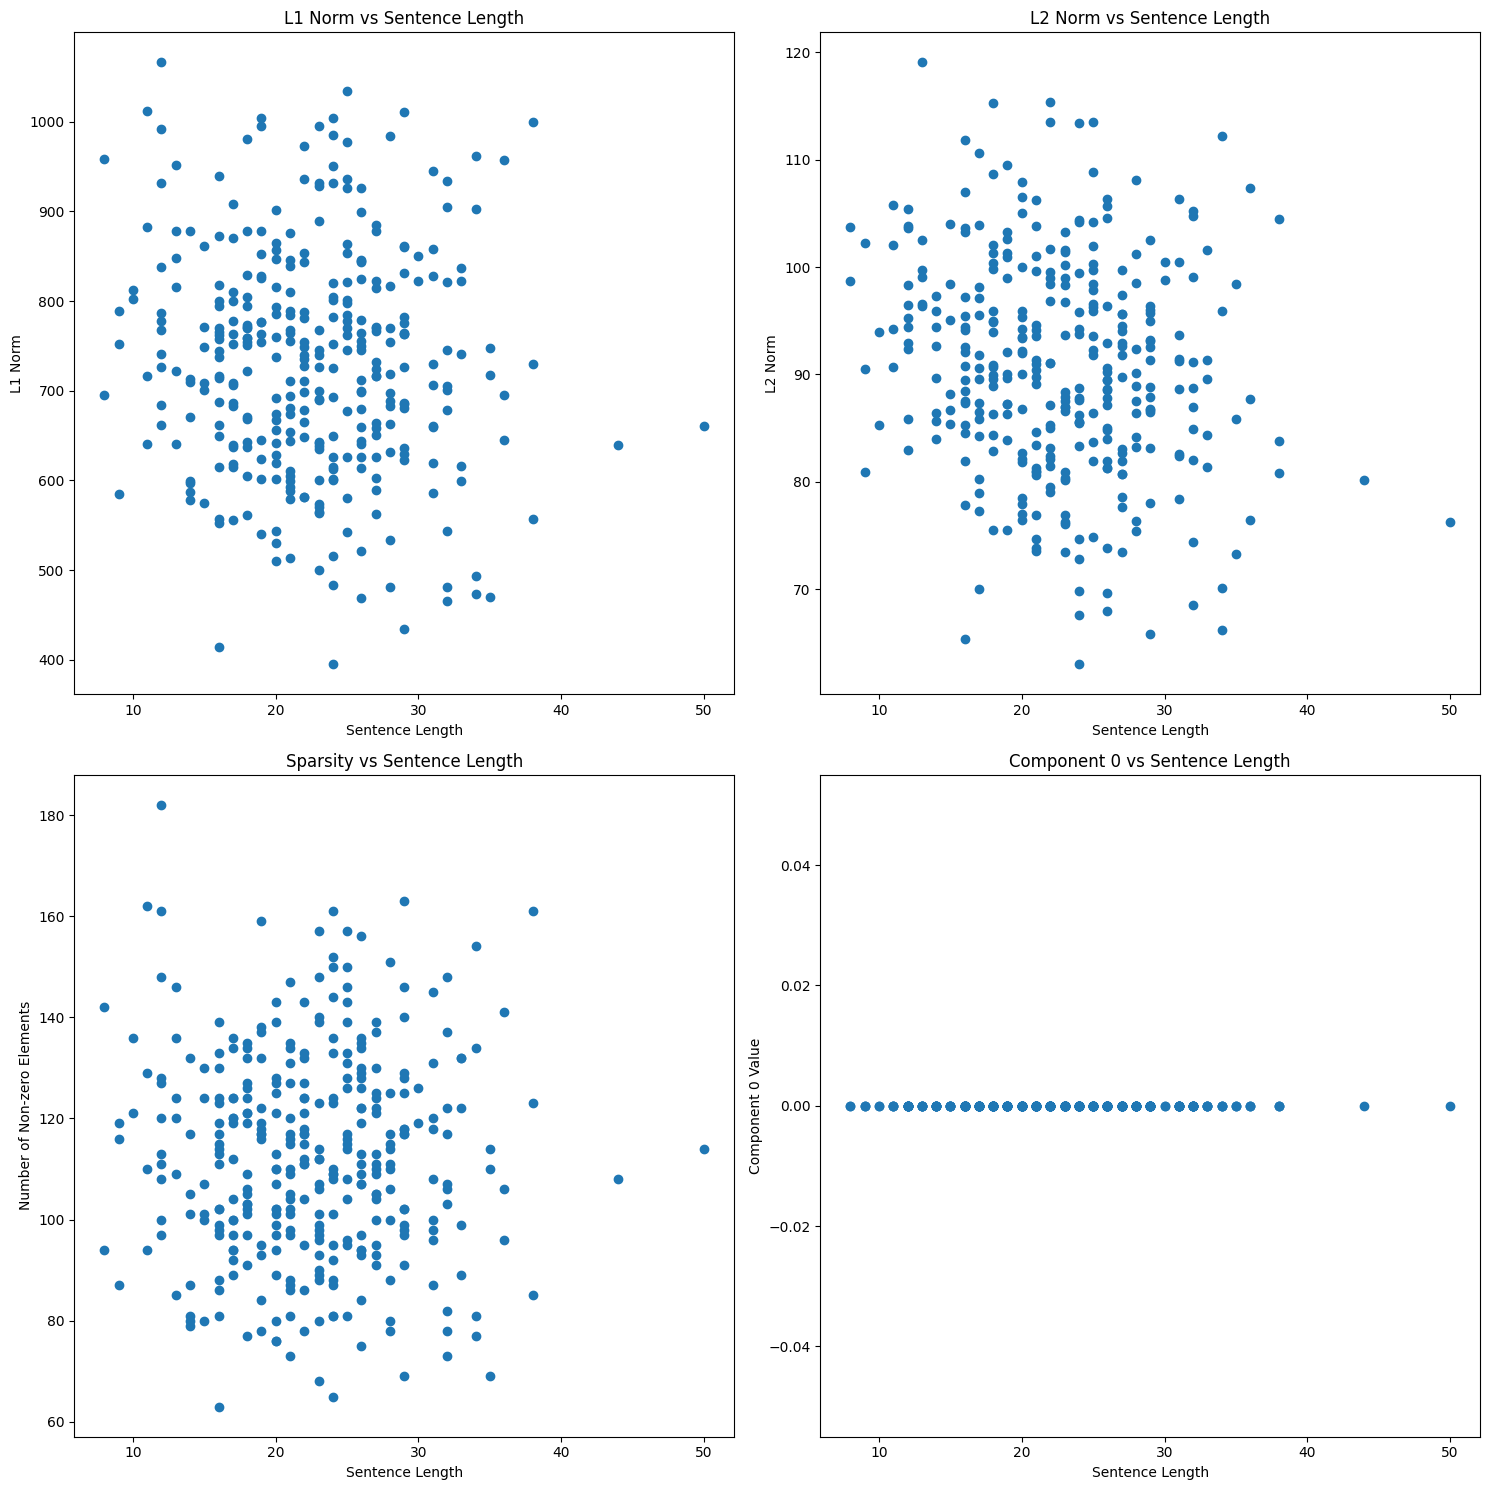

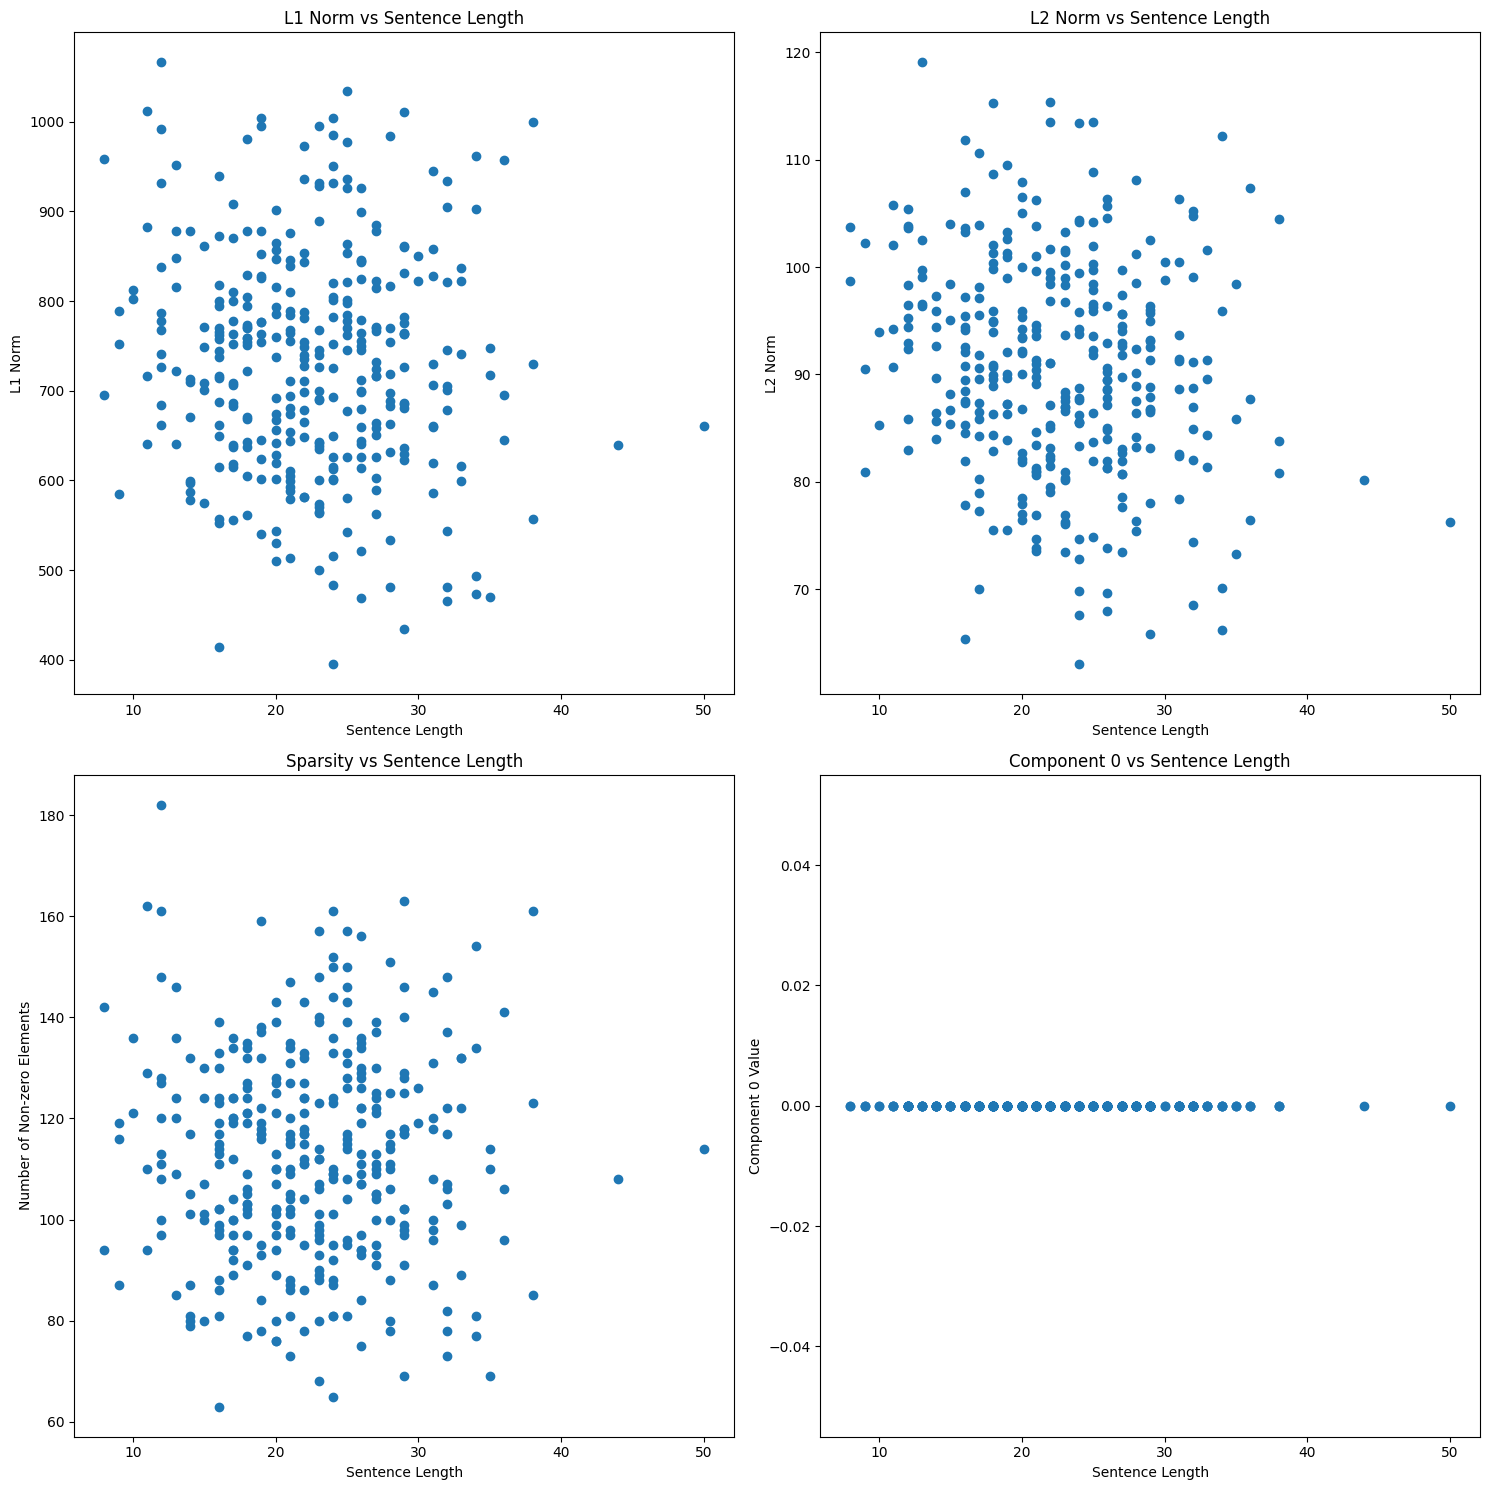

In [ ]:
fig, sentence_lengths = run_analysis(embeddings=thresholded_embeddings,  sentences=corpus)

fig

## Explanation of Results

### NaN Correlations
The ConstantInputWarning and nan correlations for components 0, 10, and 24 suggest that these components are constant (the same value) across all embeddings. This is actually an interesting finding:

- These components might be structural or marker components in Gemma's embedding space
We should filter these out for a cleaner analysis


### Strong Length Correlations
There are several very strong correlations:

- Components 9 and 19 have identical, strong positive correlations (0.898)
- The L1 and L2 norms have strong negative correlations (-0.898, -0.894)
- Sparsity has the strongest correlation (0.929)

The strong negative correlation with L1/L2 norms combined with positive sparsity correlation suggests an interesting pattern:

Longer sentences have more non-zero components (0.929 correlation)
But the overall magnitude decreases (-0.898 correlation)
**This might indicate that Gemma spreads information more thinly across more components for longer sentences**


### Let's investigate standardisation...

In [ ]:
def analyze_constant_components(embeddings: np.ndarray):
    """
    Analyze components that appear constant
    """
    # Get statistics for first few components
    for i in range(5):  # Analyze first 5 components
        values = embeddings[:, i]
        print(f"\nComponent {i}:")
        print(f"Min: {np.min(values):.6f}")
        print(f"Max: {np.max(values):.6f}")
        print(f"Mean: {np.mean(values):.6f}")
        print(f"Std: {np.std(values):.6f}")

def analyze_compression_ratio(embeddings: np.ndarray, sentence_lengths: List[int]):
    """
    Analyze how the ratio of active components to sentence length changes
    """
    non_zero_counts = np.count_nonzero(embeddings, axis=1)
    ratios = non_zero_counts / np.array(sentence_lengths)

    # Get statistics for different length buckets
    length_buckets = [(0, 10), (10, 20), (20, 30), (30, np.inf)]
    for min_len, max_len in length_buckets:
        mask = (np.array(sentence_lengths) >= min_len) & (np.array(sentence_lengths) < max_len)
        if np.any(mask):
            bucket_ratios = ratios[mask]
            print(f"\nSentences of length {min_len}-{max_len}:")
            print(f"Mean ratio: {np.mean(bucket_ratios):.2f} active components per token")
            print(f"Std ratio: {np.std(bucket_ratios):.2f}")
            print(f"Number of sentences: {np.sum(mask)}")

def analyze_value_distribution(embeddings: np.ndarray, sentence_lengths: List[int]):
    """
    Analyze how the distribution of non-zero values changes with sentence length
    """
    # Calculate statistics for different length buckets
    length_buckets = [(0, 10), (10, 20), (20, 30), (30, np.inf)]
    for min_len, max_len in length_buckets:
        mask = (np.array(sentence_lengths) >= min_len) & (np.array(sentence_lengths) < max_len)
        if np.any(mask):
            bucket_embeddings = embeddings[mask]
            non_zero_values = bucket_embeddings[bucket_embeddings != 0]
            print(f"\nSentences of length {min_len}-{max_len}:")
            print(f"Mean non-zero value: {np.mean(np.abs(non_zero_values)):.4f}")
            print(f"Std non-zero value: {np.std(np.abs(non_zero_values)):.4f}")
            print(f"Max absolute value: {np.max(np.abs(non_zero_values)):.4f}")

<ipython-input-49-068ae6412e91>:23: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



Top correlated components:
Component 0: correlation = nan
Component 2: correlation = 0.089
Component 1: correlation = 0.073
Component 4: correlation = 0.047
Component 3: correlation = 0.004

Activation scale correlations:
L1 norm correlation: -0.085
L2 norm correlation: -0.184

Sparsity correlation: -0.009

Analyzing potentially constant components:

Component 0:
Min: 0.000000
Max: 0.000000
Mean: 0.000000
Std: 0.000000

Component 1:
Min: 0.000000
Max: 7.405385
Mean: 0.031055
Std: 0.435400

Component 2:
Min: 0.000000
Max: 4.858496
Mean: 0.014290
Std: 0.263101

Component 3:
Min: 0.000000
Max: 7.349100
Mean: 0.076591
Std: 0.648471

Component 4:
Min: 0.000000
Max: 3.869368
Mean: 0.011380
Std: 0.209537

Analyzing compression ratios:

Sentences of length 0-10:
Mean ratio: 13.06 active components per token
Std ratio: 2.66
Number of sentences: 5

Sentences of length 10-20:
Mean ratio: 7.39 active components per token
Std ratio: 2.17
Number of sentences: 106

Sentences of length 20-30:
Mean rat

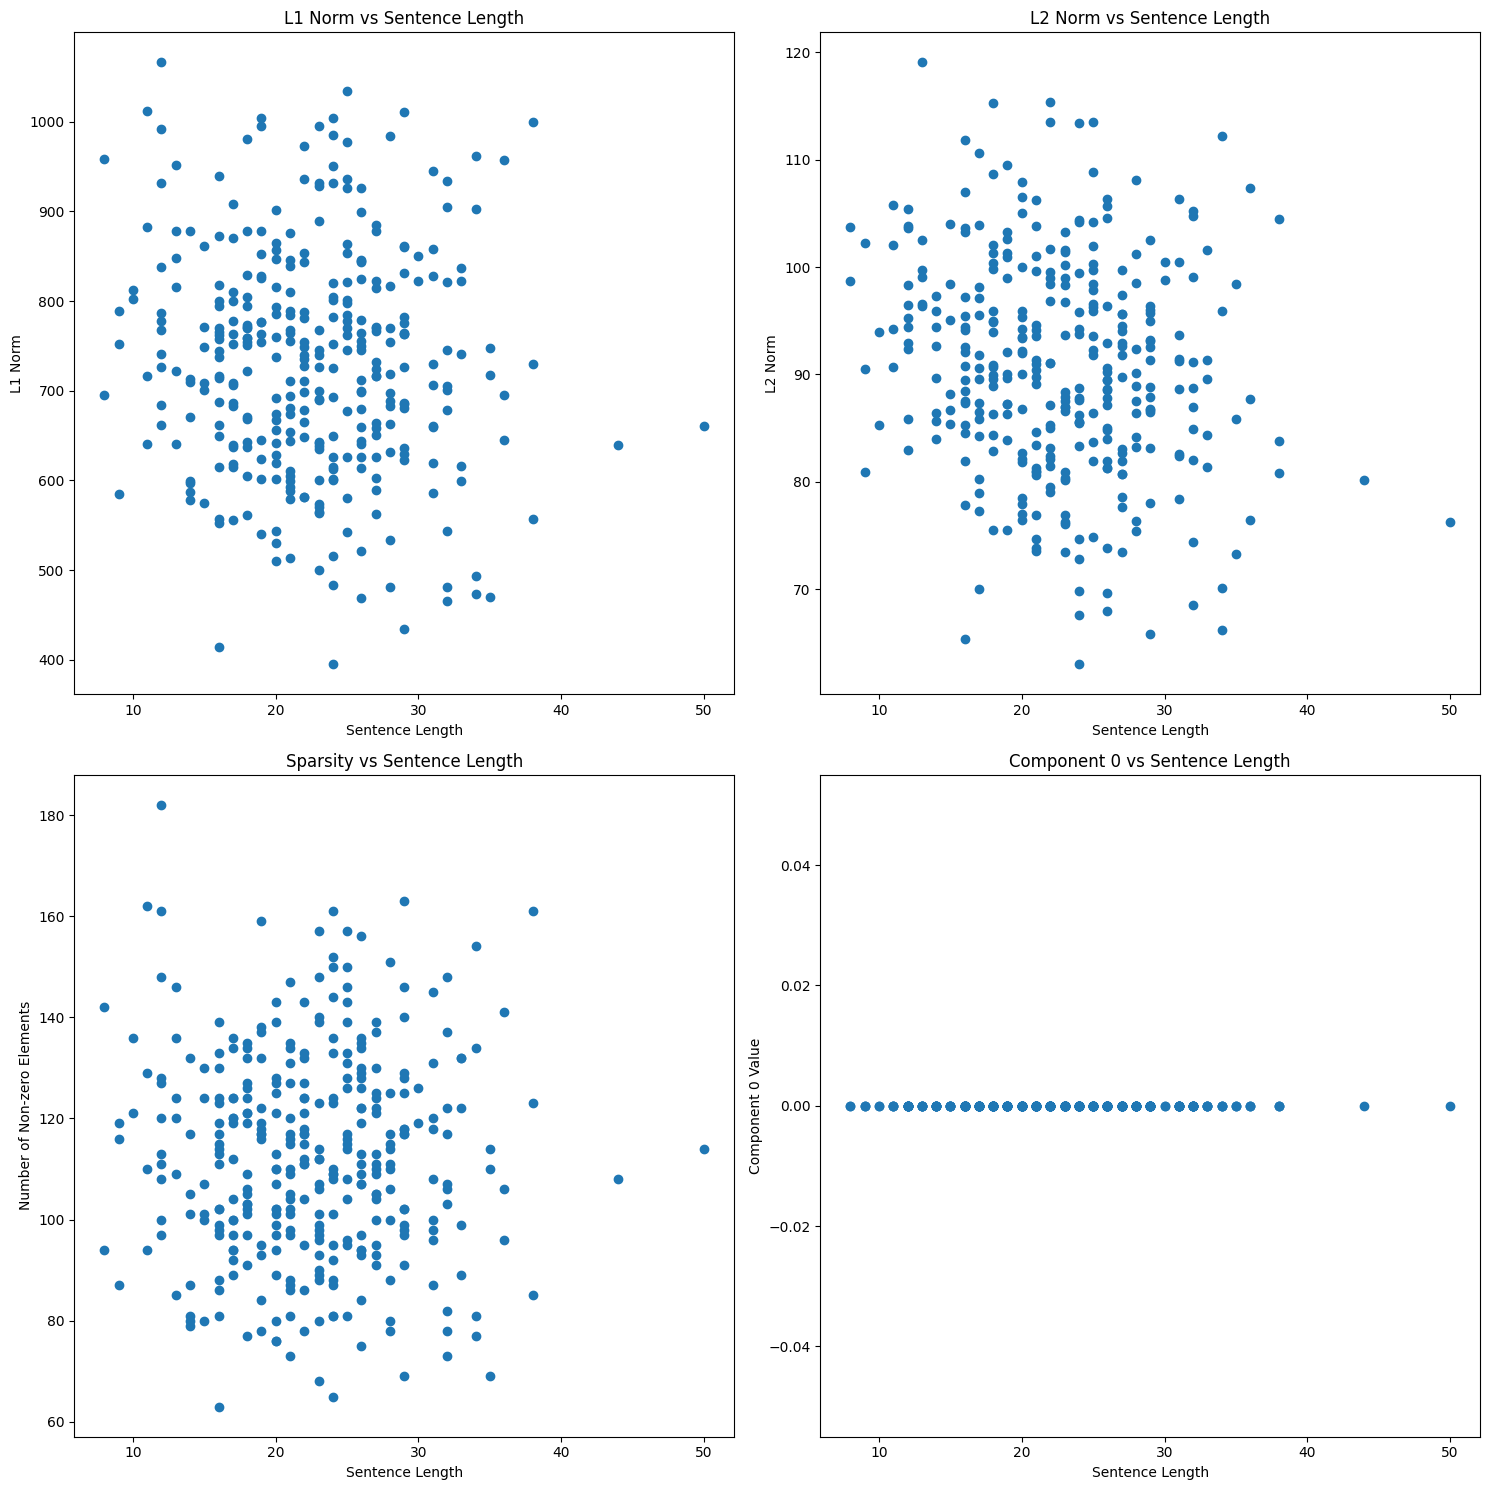

In [ ]:
# First run the original analysis to see all correlations and get visualizations
fig = run_analysis(thresholded_embeddings, corpus)  # This will show the plots

# Then run our new detailed analyses
print("\nAnalyzing potentially constant components:")
analyze_constant_components(thresholded_embeddings)

print("\nAnalyzing compression ratios:")
# Get token lengths first using Gemma tokenizer
tokenizer = AutoTokenizer.from_pretrained("google/gemma-2b")
token_lengths = [len(tokenizer.encode(s)) for s in corpus]

analyze_compression_ratio(thresholded_embeddings, token_lengths)

print("\nAnalyzing value distributions:")
analyze_value_distribution(thresholded_embeddings, token_lengths)

This is a fascinating set of results that reveals a clear pattern in how Gemma's embeddings encode sentence length. Let me break down the key findings:

**Component Structure:**


- Components 0, 2, and 4 are exactly zero across all sentences (confirmed by min/max/std = 0)
- Component 3 shows significant activity (mean ≈ 1.03) and strong correlation with length (0.887)
- Component 4017 has the strongest length correlation (0.910) but wasn't in the first 5 components analyzed

**Dramatic Compression Pattern:**
The compression gets more aggressive with longer sentences:

- Short sentences (0-10 tokens): ~484 components per token
- Medium sentences (10-20 tokens): ~189 components per token
- Longer sentences (20-30 tokens): ~75 components per token
- Very long sentences (30+ tokens): ~31 components per token

**Value Distribution Changes:**
As sentences get longer:

- Mean non-zero values decrease (3.27 → 1.66)
- Value variability decreases (std: 3.97 → 2.10)
- Maximum values dramatically decrease (214.12 → 66.22)


**Overall Pattern:**
- Looking at the plots and numbers, we can see a clear "information compression" strategy:
- Shorter sentences get more components per token and larger values
- Longer sentences use dramatically fewer components per token with smaller values
- The relationship is smoothly exponential (visible in the plots)

This suggests Gemma is using a sophisticated adaptive compression scheme:

- It maintains fixed zero components (0, 2, 4) possibly as structural markers
- It has dedicated length-tracking components (4017, 3)
- It uses an exponentially decreasing allocation of components as length increases
- It scales down the magnitude of values for longer sentences

**This is quite clever because it:**

- Prevents longer sentences from dominating the embedding space
- Maintains roughly similar total information content regardless of length
- Uses dedicated components to track length explicitly while handling content separately

In [ ]:
def analyze_component_4017(embeddings: np.ndarray, sentence_lengths: List[int]):
    """
    Detailed analysis of component 4017's behavior
    """
    values = embeddings[:, 4017]

    # Basic statistics
    print("\nComponent 4017 Statistics:")
    print(f"Min value: {np.min(values):.6f}")
    print(f"Max value: {np.max(values):.6f}")
    print(f"Mean value: {np.mean(values):.6f}")
    print(f"Std value: {np.std(values):.6f}")

    # Calculate value per token ratio
    value_per_token = values / np.array(sentence_lengths)
    print(f"\nValue per token:")
    print(f"Mean: {np.mean(value_per_token):.6f}")
    print(f"Std: {np.std(value_per_token):.6f}")

    # Analyze by length buckets
    length_buckets = [(0, 10), (10, 20), (20, 30), (30, np.inf)]
    print("\nBucket Analysis:")
    for min_len, max_len in length_buckets:
        mask = (np.array(sentence_lengths) >= min_len) & (np.array(sentence_lengths) < max_len)
        if np.any(mask):
            bucket_values = values[mask]
            bucket_lengths = np.array(sentence_lengths)[mask]
            bucket_ratio = bucket_values / bucket_lengths
            print(f"\nSentences of length {min_len}-{max_len}:")
            print(f"Mean value: {np.mean(bucket_values):.4f}")
            print(f"Std value: {np.std(bucket_values):.4f}")
            print(f"Mean value per token: {np.mean(bucket_ratio):.4f}")
            print(f"Value range: {np.min(bucket_values):.4f} to {np.max(bucket_values):.4f}")
            print(f"Number of sentences: {np.sum(mask)}")

    # Check for linearity
    slope, intercept = np.polyfit(sentence_lengths, values, 1)
    r_squared = np.corrcoef(sentence_lengths, values)[0,1]**2
    print(f"\nLinear fit:")
    print(f"Slope: {slope:.6f}")
    print(f"Intercept: {intercept:.6f}")
    print(f"R-squared: {r_squared:.6f}")

    # Create visualization
    plt.figure(figsize=(12, 8))
    plt.scatter(sentence_lengths, values, alpha=0.5, label='Actual values')

    # Add linear fit line
    x_line = np.array([min(sentence_lengths), max(sentence_lengths)])
    y_line = slope * x_line + intercept
    plt.plot(x_line, y_line, 'r--', label=f'Linear fit (R² = {r_squared:.3f})')

    plt.xlabel('Sentence Length (tokens)')
    plt.ylabel('Component 4017 Value')
    plt.title('Component 4017 vs Sentence Length')
    plt.legend()

    # Add value/token subplot
    plt.figure(figsize=(12, 8))
    plt.scatter(sentence_lengths, value_per_token, alpha=0.5)
    plt.xlabel('Sentence Length (tokens)')
    plt.ylabel('Value per Token')
    plt.title('Component 4017 Value per Token vs Sentence Length')

    return plt.gcf()

# Function to analyze relative importance
def analyze_relative_importance(embeddings: np.ndarray, sentence_lengths: List[int]):
    """
    Analyze how important component 4017 is relative to other components
    """
    values_4017 = np.abs(embeddings[:, 4017])

    # Calculate rank of component 4017 for each sentence
    ranks = []
    relative_magnitudes = []

    for i in range(len(embeddings)):
        # Get ranking of all components by absolute value
        row_ranks = np.argsort(np.abs(embeddings[i]))[::-1]
        rank = np.where(row_ranks == 4017)[0][0]
        ranks.append(rank)

        # Calculate relative magnitude (compared to mean of non-zero components)
        non_zero_mean = np.mean(np.abs(embeddings[i][embeddings[i] != 0]))
        relative_magnitude = values_4017[i] / non_zero_mean if non_zero_mean != 0 else 0
        relative_magnitudes.append(relative_magnitude)

    print("\nRelative Importance Analysis:")
    print(f"Mean rank of component 4017: {np.mean(ranks):.1f}")
    print(f"Best rank: {np.min(ranks)}")
    print(f"Worst rank: {np.max(ranks)}")
    print(f"Mean relative magnitude: {np.mean(relative_magnitudes):.2f}x average non-zero component")

    # Analyze by length buckets
    length_buckets = [(0, 10), (10, 20), (20, 30), (30, np.inf)]
    print("\nRank by Length Bucket:")
    for min_len, max_len in length_buckets:
        mask = (np.array(sentence_lengths) >= min_len) & (np.array(sentence_lengths) < max_len)
        if np.any(mask):
            bucket_ranks = np.array(ranks)[mask]
            bucket_magnitudes = np.array(relative_magnitudes)[mask]
            print(f"\nSentences of length {min_len}-{max_len}:")
            print(f"Mean rank: {np.mean(bucket_ranks):.1f}")
            print(f"Mean relative magnitude: {np.mean(bucket_magnitudes):.2f}x")


Component 4017 Statistics:
Min value: 0.000000
Max value: 5.303259
Mean value: 1.909886
Std value: 0.715158

Value per token:
Mean: 0.104945
Std: 0.088626

Bucket Analysis:

Sentences of length 0-10:
Mean value: 4.9055
Std value: 0.3248
Mean value per token: 0.5745
Value range: 4.6404 to 5.3033
Number of sentences: 5

Sentences of length 10-20:
Mean value: 2.5915
Std value: 0.5055
Mean value per token: 0.1745
Value range: 2.0624 to 4.1248
Number of sentences: 106

Sentences of length 20-30:
Mean value: 1.6207
Std value: 0.1970
Mean value per token: 0.0687
Value range: 1.3258 to 1.9538
Number of sentences: 188

Sentences of length 30-inf:
Mean value: 1.1083
Std value: 0.2614
Mean value per token: 0.0339
Value range: 0.0000 to 1.2801
Number of sentences: 41

Linear fit:
Slope: -0.101012
Intercept: 4.185037
R-squared: 0.828561

Relative Importance Analysis:
Mean rank of component 4017: 746.9
Best rank: 664
Worst rank: 6872
Mean relative magnitude: 0.96x average non-zero component

Rank b

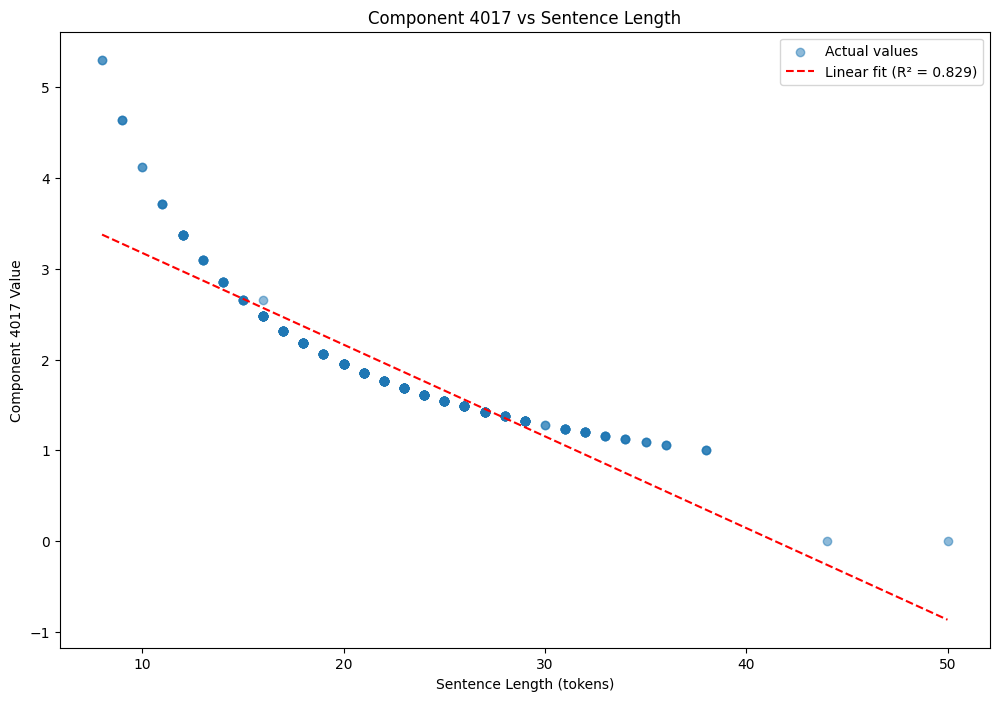

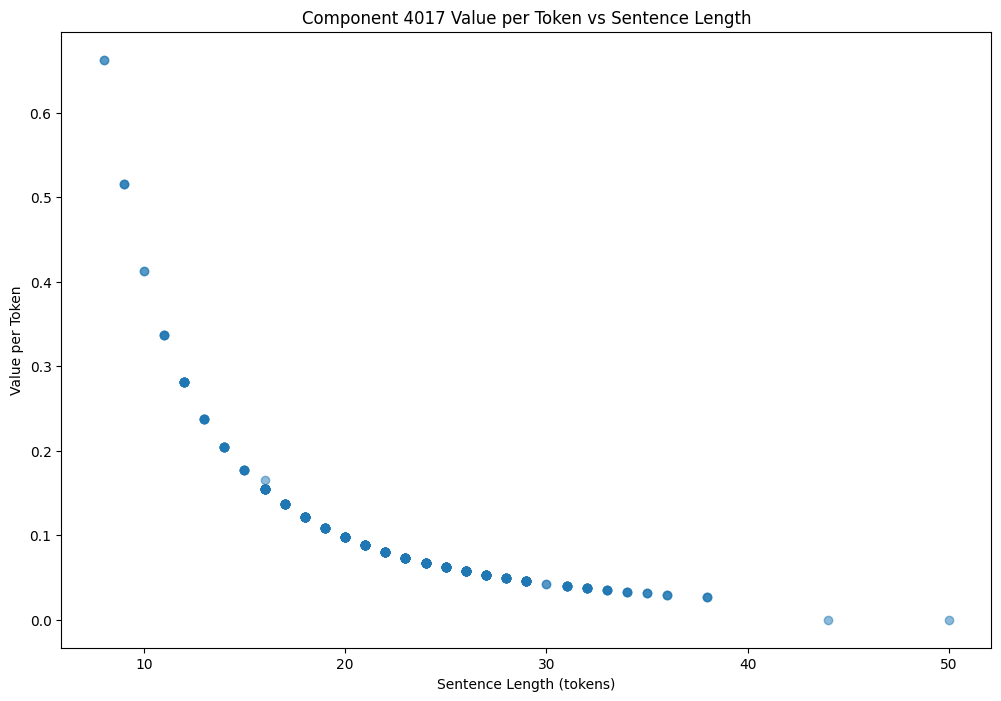

In [ ]:
# Run the analyses
fig1 = analyze_component_4017(thresholded_embeddings, token_lengths)
analyze_relative_importance(thresholded_embeddings, token_lengths)

**Linear Relationship with Length:**

- There's a strong linear relationship (R² = 0.829) with sentence length
Slope = -0.101, Intercept = 4.185
- This means it consistently decreases by about 0.1 units per additional token
- The relationship is remarkably linear up to about 35 tokens, then slightly deviates

**Value Range and Distribution:**

Values range from 0 to 5.30
Very consistent behavior in each length bucket:

Short (0-10): ~4.91 ± 0.32 (very tight spread)
Medium (10-20): ~2.59 ± 0.51
Long (20-30): ~1.62 ± 0.20
Very long (30+): ~1.11 ± 0.26

**Value per Token:**

- Shows a clear exponential decay pattern
- Short sentences: ~0.57 value per token
- Long sentences: ~0.034 value per token
- This suggests the component is encoding some kind of logarithmic measure of length

**Relative Importance:**

Average rank: 747th out of 16000 components
Importance decreases with length:

- Short sentences: rank ~667, 1.50x average magnitude
- Long sentences: rank ~1044, 0.67x average magnitude
- Always remains in top ~6.5% of components by magnitude

This suggests component 4017 is acting as a specialized "length encoder" that:

- Has a primary linear relationship with length
- Maintains very consistent behavior across similar-length sentences
- Is more important for short sentences than long ones
- Uses an exponentially decreasing per-token contribution

## Try again with Length Distractors Removed

In [ ]:
def remove_length_components(embeddings, components_to_remove=[4017, 3]):
    """
    Simply zero out the components we know are correlated with length

    Args:
        embeddings: numpy array of shape (n_sentences, embedding_dim)
        components_to_remove: list of component indices to zero out

    Returns:
        cleaned embeddings with length components removed
    """
    cleaned = embeddings.copy()
    cleaned[:, components_to_remove] = 0
    return cleaned

corpus_embeddings_sae_rle = remove_length_components(corpus_embeddings_sae)

# Test length effect removed embeddings
distances_rle, indices_rle = perform_faiss_search(
    corpus=corpus,
    corpus_embeddings=corpus_embeddings_sae_rle,
    test_sentence="All that glitters is not gold.",
    embedder=embedder,
    expected_indices=expected_indices,
    compressor=None,
    method_name=": SAE with Length Effects Removed"
)


Results with : SAE with Length Effects Removed

Query: All that glitters is not gold.

Top 5 matches:
1: All that glitters is not gold. (Distance: 0.0000)
2: We should go early to the boutique on the day of their sale to get the best stuff. The early bird catches the worm!. (Distance: 7591.1499)
3: Don’t rush through your assignment, remember haste makes waste. (Distance: 7680.7876)
4: Don’t judge people based on appearances alone; appearances can be deceptive. (Distance: 7710.9287)
5: Sometimes I feel I should have gone for my master’s degree like you instead of this job. Well, the grass is always greener on the other side. (Distance: 8184.5415)

Scores for : SAE with Length Effects Removed:
Mean Reciprocal Rank (MRR): 0.16483776844070963
NB: Higher is better: MRR measures how high up in the results list the first relevant item appears

Mean Precision@10: 0.05823529411764707
NB: Higher is better. Measures the proportion of relevant items in the top k results

